In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

<b>Dataset: </b> https://www.kaggle.com/altavish/boston-housing-dataset

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per dollar 10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - lower status of the population-percentage
* MEDV - Median value of owner-occupied homes in $1000's

In [2]:
house_data = pd.read_csv('datasets/HousingData.csv')

house_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
house_data.shape

(506, 14)

In [4]:
house_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
house_data = house_data.drop(['CRIM', 'B'], axis=1)

house_data.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [10]:
house_data

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [11]:
house_data.isnull().sum()

ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
house_data.dropna(inplace=True, axis=0)

In [13]:
house_data.shape

(413, 12)

In [16]:
median_price = np.median(house_data['MEDV'])

median_price

np.float64(21.2)

In [17]:
house_data['above_median'] = np.where(house_data['MEDV'] > median_price, 1, 0)

house_data.sample(10)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,above_median
263,20.0,3.97,0.0,0.647,7.327,94.5,2.0788,5,264,13.0,11.25,31.0,1
247,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7,330,19.1,10.15,20.5,0
335,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5,224,20.2,8.01,21.1,0
105,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5,384,20.9,16.47,19.5,0
400,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24,666,20.2,26.77,5.6,0
94,28.0,15.04,0.0,0.464,6.249,77.3,3.6150,4,270,18.2,10.59,20.6,0
372,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24,666,20.2,8.88,50.0,1
17,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4,307,21.0,14.67,17.5,0
114,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6,432,17.8,10.45,18.5,0
234,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8,307,17.4,8.05,29.0,1


In [18]:
house_data.to_csv('datasets/house_data_processed.csv', index = False)

In [19]:
!ls datasets/

500_Person_Gender_Height_Weight_Index.csv
HousingData.csv
Mall_Customers.json
Salary_Data.csv
auto-mpg.csv
automobile_data_processed.csv
house_data_processed.csv
mall_data_column_oriented.json
mall_data_index_oriented.json
mall_data_processed.csv
mall_data_records_oriented.json
mall_data_values_oriented.json
sp500_1987.csv
weight-height.csv


### Bivariate data analysis

In [20]:
house_data_selected = house_data[['MEDV', 'RM', 'DIS', 'AGE']]

house_data_selected.head(10)

,MEDV,RM,DIS,AGE
0,24.0,6.575,4.0900,65.2
1,21.6,6.421,4.9671,78.9
2,34.7,7.185,4.9671,61.1
3,33.4,6.998,6.0622,45.8
5,28.7,6.430,6.0622,58.7
7,27.1,6.172,5.9505,96.1
8,16.5,5.631,6.0821,100.0
10,15.0,6.377,6.3467,94.3
11,18.9,6.009,6.2267,82.9
12,21.7,5.889,5.4509,39.0


Text(0.5, 1.0, 'House Data')

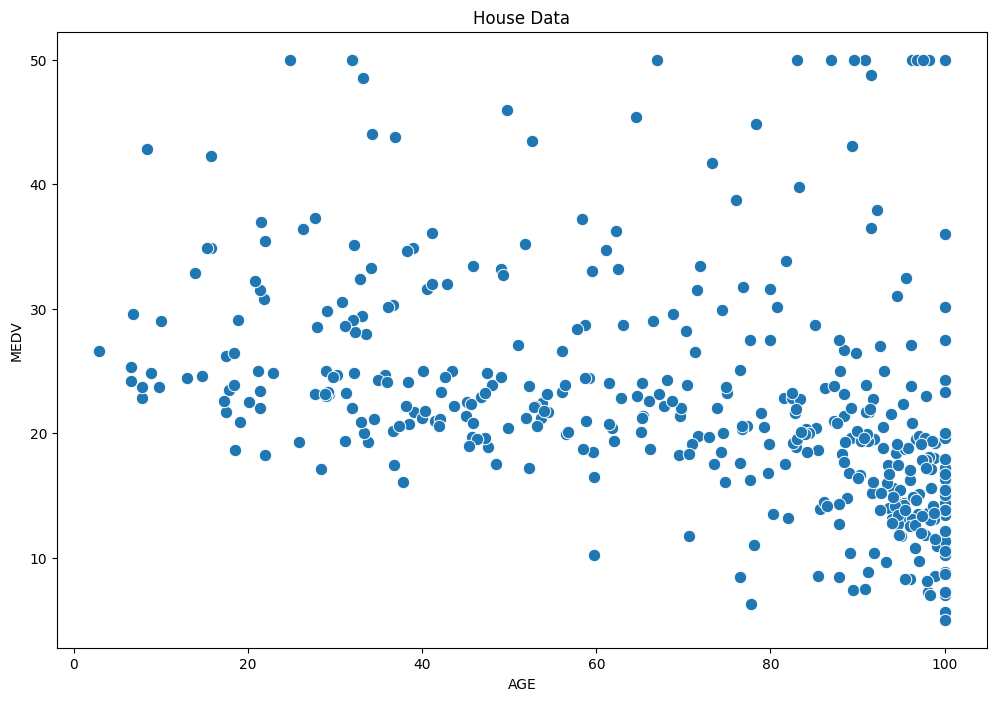

In [21]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='AGE', y='MEDV', s=80, 
                data=house_data_selected)

plt.title('House Data')

Text(0.5, 1.0, 'House Data')

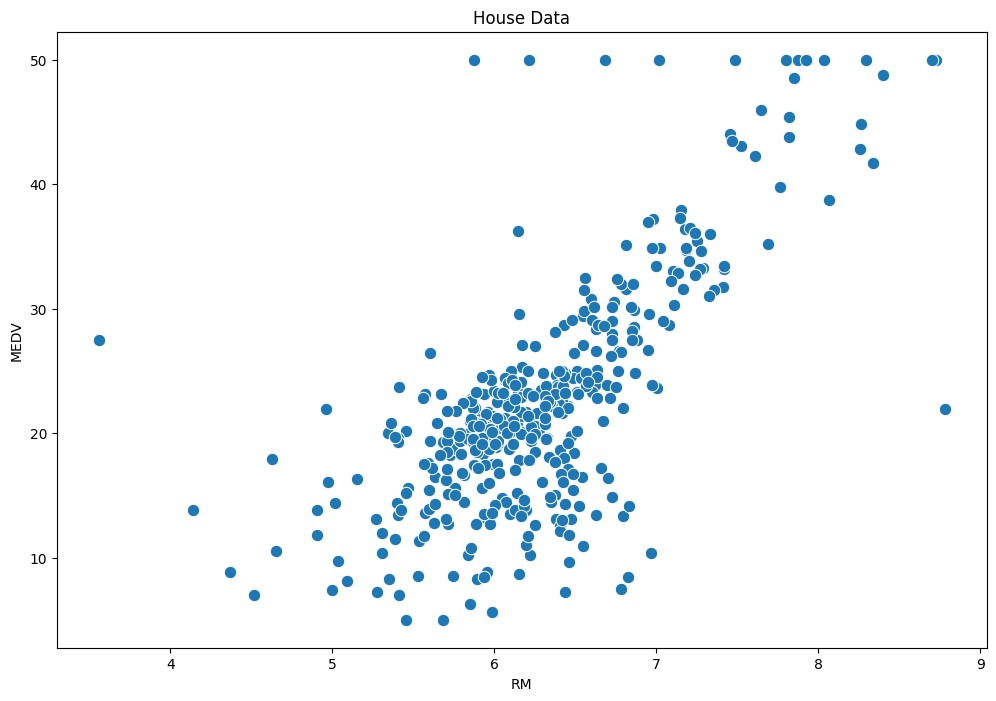

In [22]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='RM', y='MEDV', s=80, 
                data=house_data_selected)

plt.title('House Data')

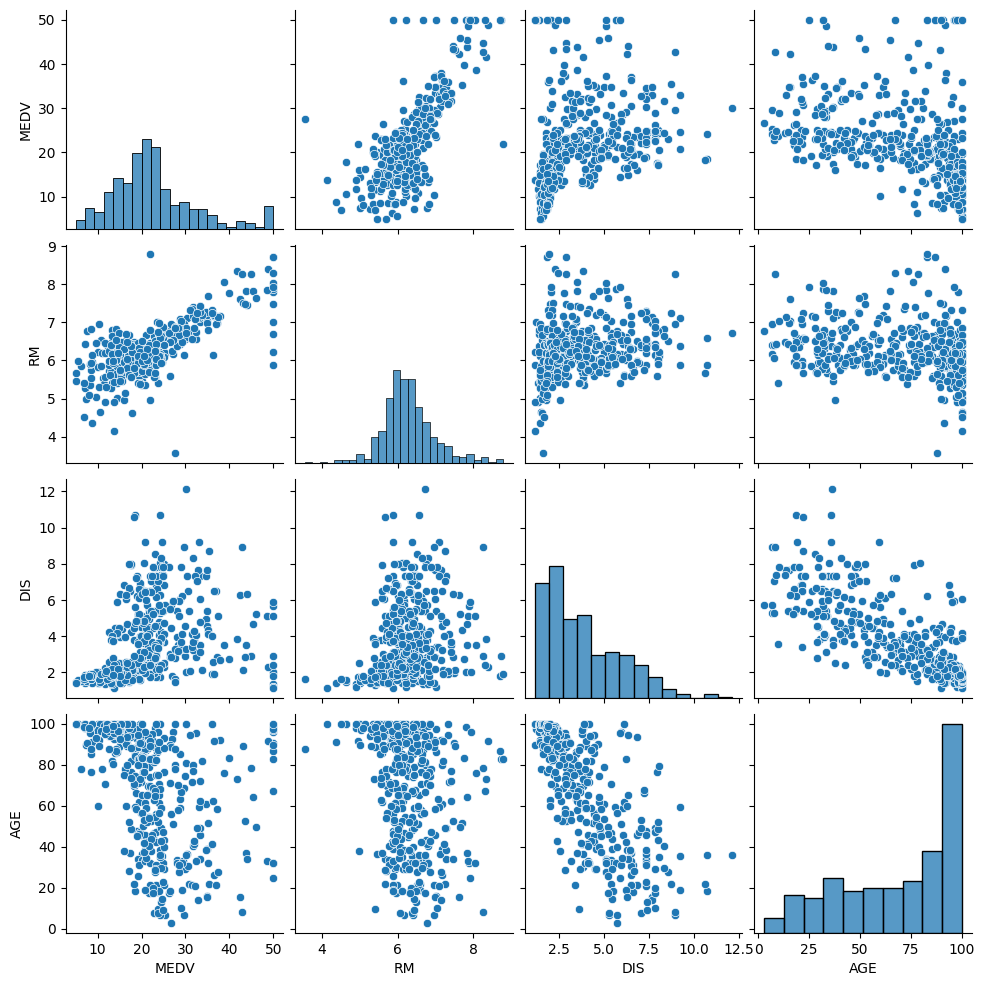

In [23]:
sns.pairplot(house_data_selected)

plt.show()

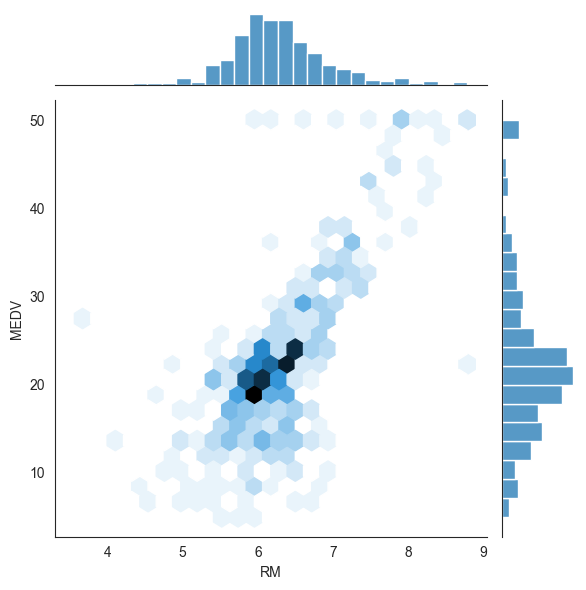

In [24]:
with sns.axes_style('white'):
    sns.jointplot(x='RM', y='MEDV', data=house_data_selected, kind='hex')
    
    plt.show()

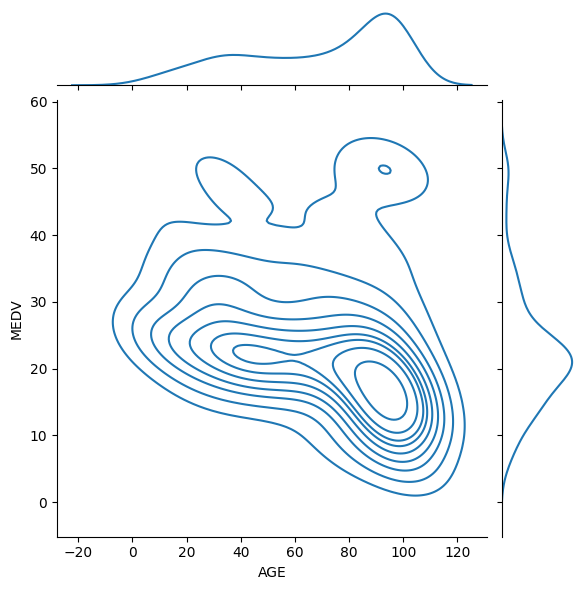

In [25]:
sns.jointplot(x='AGE', y='MEDV', data=house_data_selected, kind='kde')

plt.show()

### Covarience

In [27]:
house_data_selected_cov = np.cov(house_data_selected.T)

house_data_selected_cov

array([[ 8.58208309e+01,  4.67920480e+00,  5.24740037e+00,
        -1.01087693e+02],
       [ 4.67920480e+00,  4.84228930e-01,  3.10710909e-01,
        -4.66159380e+00],
       [ 5.24740037e+00,  3.10710909e-01,  4.41923295e+00,
        -4.44951470e+01],
       [-1.01087693e+02, -4.66159380e+00, -4.44951470e+01,
         7.84487407e+02]])

### Correlation

In [28]:
house_data_selected_corr = np.corrcoef(house_data_selected.T)

house_data_selected_corr

array([[ 1.        ,  0.72585577,  0.26944765, -0.38959102],
       [ 0.72585577,  1.        ,  0.21240155, -0.23917516],
       [ 0.26944765,  0.21240155,  1.        , -0.75569441],
       [-0.38959102, -0.23917516, -0.75569441,  1.        ]])

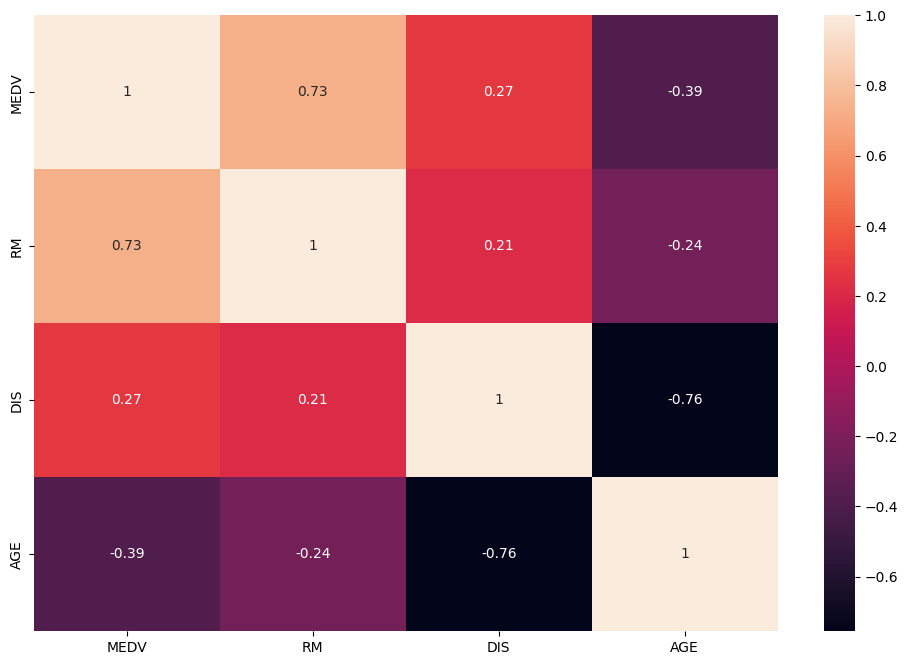

In [29]:
plt.figure(figsize=(12, 8))

sns.heatmap(house_data_selected_corr, 
            xticklabels=house_data_selected.columns, 
            yticklabels=house_data_selected.columns,
            annot=True)

plt.show()

### Linear Regression

Text(0.5, 1.0, 'Salary')

<Figure size 1200x800 with 0 Axes>

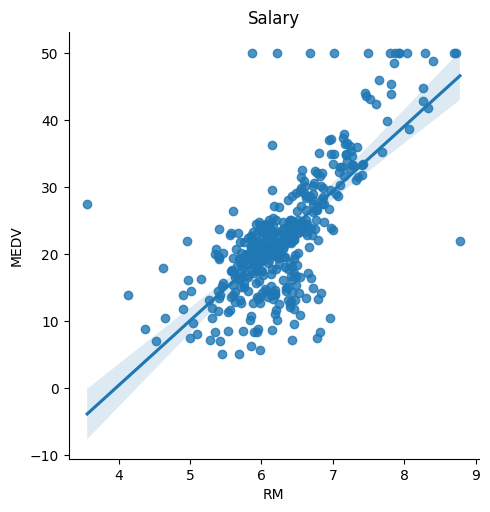

In [34]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='RM', y='MEDV', data=house_data)

plt.title('Salary')

In [35]:
slope, intercept, r_value, _, _ ,= stats.linregress(house_data['RM'], 
                                                    house_data['MEDV'])

In [36]:
print('R-square value', r_value**2)

R-square value 0.526866592034462


In [25]:
print('Slope', slope)

Slope 9.663207871720699


In [37]:
print('Intercept', intercept)

Intercept -38.28410469212912


Text(0.5, 1.0, 'Salary')

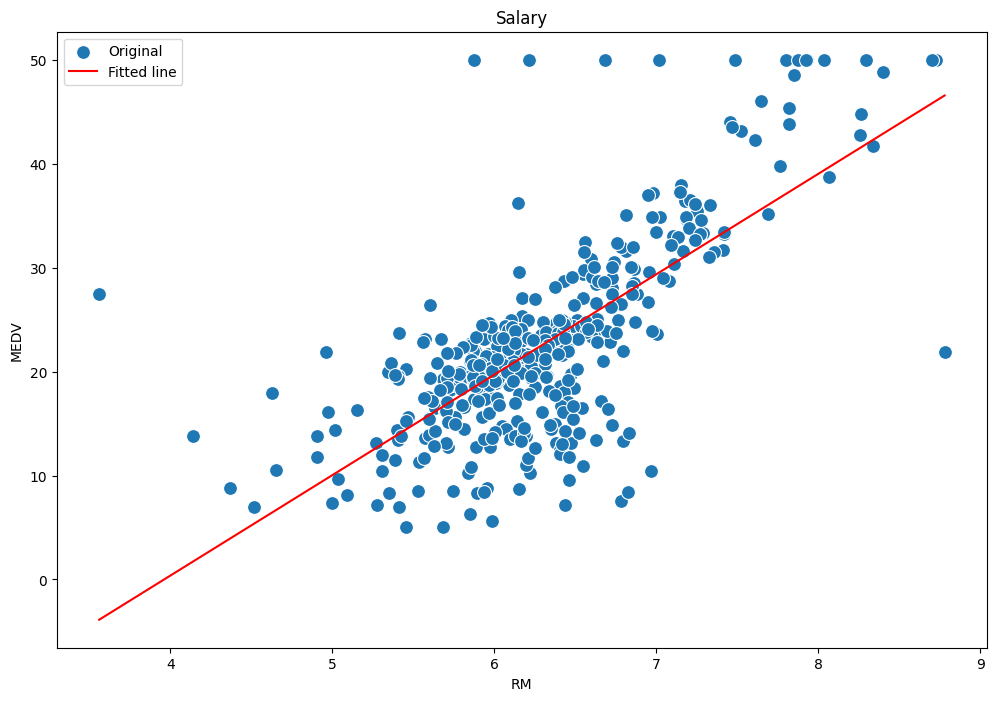

In [38]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='RM', y='MEDV', s=100, 
                data=house_data, label='Original')

sns.lineplot(x=house_data['RM'], 
             y=(slope * house_data['RM'] + intercept), 
             color='r', label='Fitted line')

plt.title('Salary')

Text(0.5, 1.0, 'House Data')

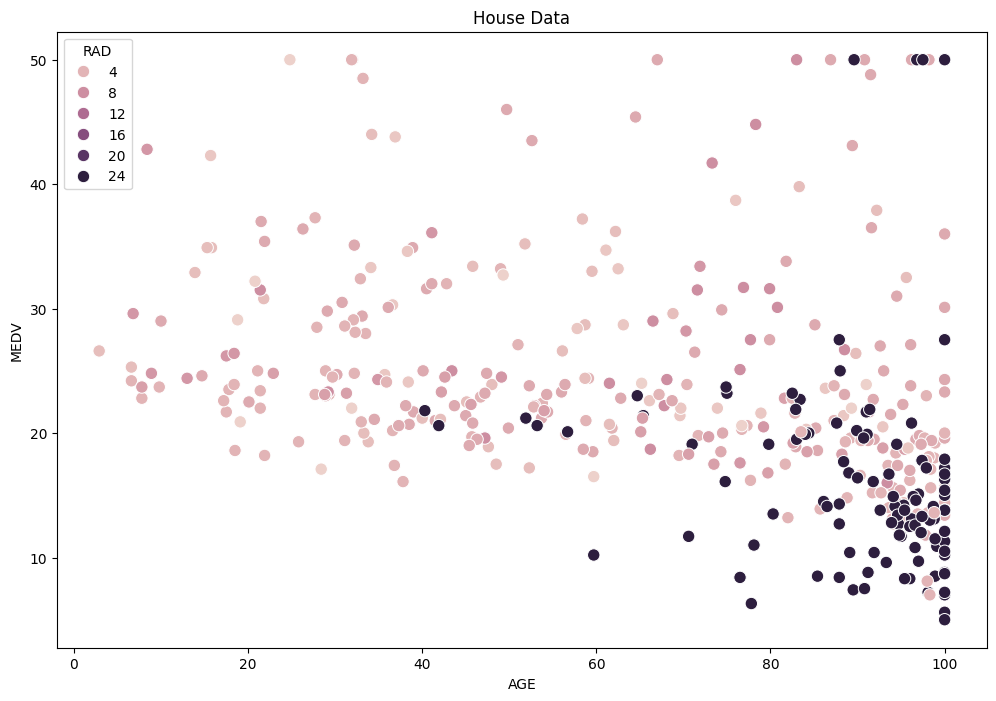

In [39]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='AGE', y='MEDV', s=80, 
                hue='RAD', data=house_data)

plt.title('House Data')

Text(0.5, 1.0, 'House Data')

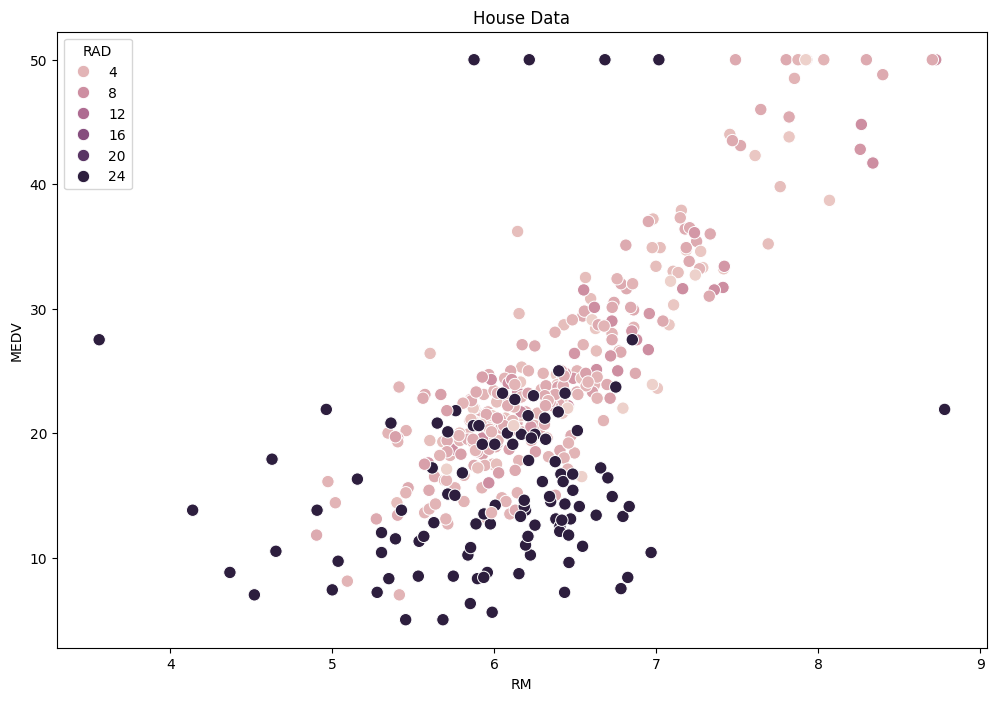

In [41]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='RM', y='MEDV', s=80, 
                hue='RAD', data=house_data)

plt.title('House Data')

In [42]:
X = house_data.drop(['MEDV', 'above_median'], axis=1)

y = house_data['MEDV']

In [43]:
X.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [44]:
reg_model = sm.OLS(y, X).fit()

reg_model.params

ZN         0.049678
INDUS     -0.023188
CHAS       4.021494
NOX       -1.909995
RM         6.455624
AGE       -0.014883
DIS       -0.901907
RAD        0.034950
TAX       -0.009153
PTRATIO   -0.259886
LSTAT     -0.399164
dtype: float64

In [45]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              880.3
Date:                Wed, 04 Feb 2026   Prob (F-statistic):                   1.98e-273
Time:                        01:08:20   Log-Likelihood:                         -1239.2
No. Observations:                 413   AIC:                                      2500.
Df Residuals:                     402   BIC:                                      2545.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0497      0.016      3.175      0.002       0.019       0.080
INDUS         -0.0232      0.071     -0.325      0.746      -0.164       0.117
CHAS           4.0215      0.975      4.126      0.000       2.106       5.937
NOX           -1.9100      3.804     -0.502      0.616      -9.388       5.568
RM             6.4556      0.349     18.522      0.000       5.770       7.141
AGE           -0.0149      0.015     -0.968      0.334      -0.045       0.015
DIS           -0.9019      0.212     -4.260      0.000      -1.318      -0.486
RAD            0.0349      0.067      0.519      0.604      -0.097       0.167
TAX           -0.0092      0.004     -2.157      0.032      -0.017      -0.001
PTRATIO       -0.2599      0.118     -2.206      0.028      -0.492      -0.028
LSTAT         -0.3992      0.055     -7.308      0.000      -0.507      -0.292
==============================================================================
Omnibus:                      151.948   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.391
Skew:                           1.426   Prob(JB):                    1.72e-209
Kurtosis:                       9.909   Cond. No.                     7.04e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""